# Multiple Linear Regression Model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [2]:
dataset = pd.read_csv("insurance.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x[:5,:])
# print(dataset.head())
# print(dataset['region'].unique())

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]


## Encoding categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [5]:
print(x[0:2])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]]


## Splitting the dataset into the Training set and Test Set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## Training the Multiple Linear Regression model on the training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the test set results

In [8]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[ 1.13e+04,  9.72e+03],
       [ 9.54e+03,  8.55e+03],
       [ 3.78e+04,  4.57e+04],
       [ 1.61e+04,  1.30e+04],
       [ 6.73e+03,  9.64e+03],
       [ 4.00e+03,  4.50e+03],
       [ 1.61e+03,  2.20e+03],
       [ 1.43e+04,  1.14e+04],
       [ 8.90e+03,  7.54e+03],
       [ 7.34e+03,  5.43e+03],
       [ 4.67e+03,  6.75e+03],
       [ 1.02e+04,  1.05e+04],
       [ 8.89e+03,  7.34e+03],
       [ 3.79e+03,  4.19e+03],
       [ 2.75e+04,  1.83e+04],
       [ 1.09e+04,  1.07e+04],
       [ 1.11e+04,  1.25e+04],
       [ 6.15e+03,  3.49e+03],
       [ 8.06e+03,  6.46e+03],
       [ 2.70e+04,  3.35e+04],
       [ 3.33e+04,  2.40e+04],
       [ 1.43e+04,  1.26e+04],
       [ 1.19e+04,  2.30e+04],
       [ 3.20e+04,  2.31e+04],
       [ 4.09e+03,  1.67e+03],
       [ 9.32e+03,  4.67e+03],
       [ 1.14e+03,  3.73e+03],
       [ 9.91e+03,  7.68e+03],
       [ 3.75e+03,  3.76e+03],
       [ 1.03e+04,  8.41e+03],
       [ 8.90e+03,  8.06e+03],
       [ 4.00e+04,  4.90e+04],
       [

## Evaluating the Model Performance

In [9]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_pred)*100
print("Accuracy: {}%".format(round(r2Score,2)))

Accuracy: 79.09%


## Regression Line

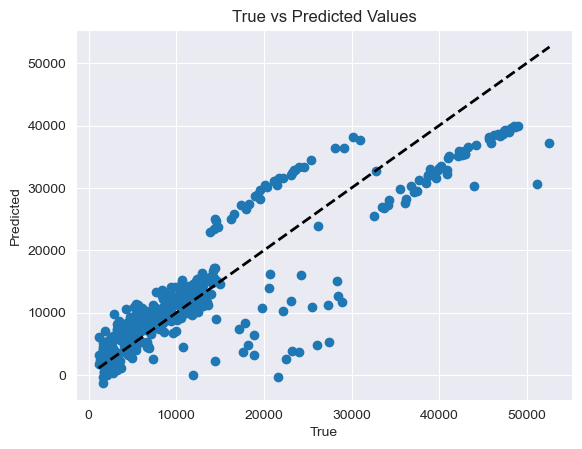

In [10]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2,)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values')
plt.show()

## Heatmap of features

/var/folders/t_/j1kf85f16f7cqq6lm4lhjr440000gn/T/ipykernel_31765/3286242281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


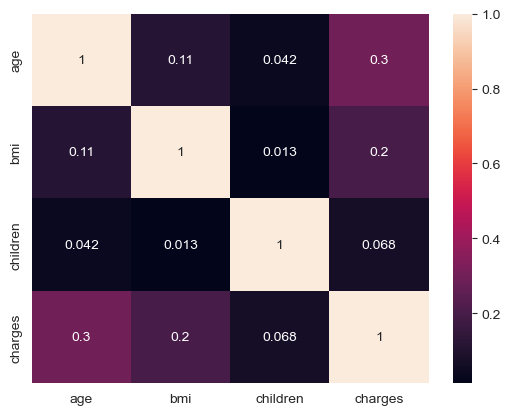

In [11]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap="rocket")
plt.show()